In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

import pandas as pd
df = pd.read_csv('pred_course.csv')
print(len(df.columns))

#print(df.Ref)
X=df[['progcode','c_num','WPA1','c_num']]
#print(X)
#df.head(10)
Y=df["WPA2"]
XX=X.values
YY=Y.values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,YY,test_size=0.1,random_state=42)
# Create an XGBoost regression model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
model.fit(X_train, Y_train)

pass
# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


8
Mean Squared Error: 1.262971639840924


In [5]:
y_pred = model.predict([[5,860,3,864]])
print(y_pred.round())

[6.]


In [6]:
pred=model.predict(X_test)
precision = precision_score(Y_test,pred.round(),average='micro')
recall = recall_score(Y_test,pred.round(),average='micro')
accuracy=accuracy_score(Y_test,pred.round())
f1=f1_score(Y_test,pred.round(),average='micro')
#y_pred_proba = regressor.predict_proba(X_test)[::,1]
#auc=metrics.roc_auc_score(Y_test,y_pred_proba)

print('Precision: ',precision)
print('Recall',recall)
print('Accuracy',accuracy)
print('F1 score',f1)

Precision:  0.375159441225738
Recall 0.375159441225738
Accuracy 0.375159441225738
F1 score 0.375159441225738


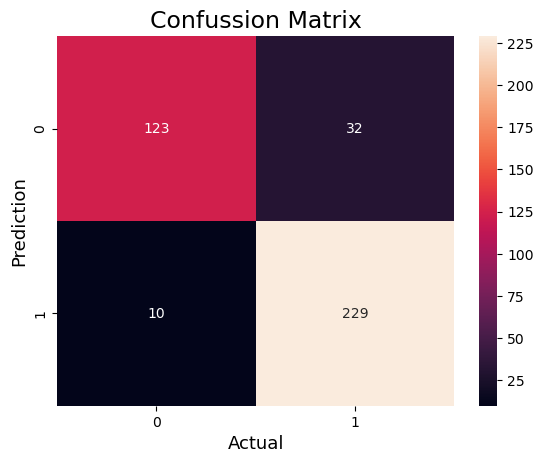

In [15]:
cm= confusion_matrix(Y_test,pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confussion Matrix', fontsize=17)
plt.show()